In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load the dataset using panda.read_csv()

In [ ]:
import pandas as pd
# From CSV file
df = pd.read_csv('/content/drive/MyDrive/Concept and Technology of AI/diabetes_dataset.csv')
print("Dataset shape:", df.shape)
print("First 5 rows:")
print(df.head())

Dataset shape: (100000, 31)
First 5 rows:
   Unnamed: 0  gender ethnicity education_level  income_level  \
0          58    Male     Asian      Highschool  Lower-Middle   
1          48  Female     White      Highschool        Middle   
2          60    Male  Hispanic      Highschool        Middle   
3          74  Female     Black      Highschool           Low   
4          46    Male     White        Graduate        Middle   

  employment_status smoking_status  alcohol_consumption_per_week  \
0          Employed          Never                             0   
1          Employed         Former                             1   
2        Unemployed          Never                             1   
3           Retired          Never                             0   
4           Retired          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1       

In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')


check missing value

In [ ]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Unnamed: 0                            0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting         

In [ ]:
target_col = 'diagnosed_diabetes'

num_samples, num_features = df.shape
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features - 1}")

Number of samples: 100000
Number of features: 30


In [ ]:
print("\nTarget distribution:")
print(df[target_col].value_counts())


Target distribution:
diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64


In [ ]:
# Show columns with object (string) type
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


Categorical columns: Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'diabetes_stage'],
      dtype='object')


In [ ]:
target_col = 'diabetes_stage'

X = df.drop(columns=[target_col])
y = df[target_col]


In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(exclude=['object']).columns

print("Categorical features:", categorical_features)
print("Numeric features:", numeric_features)


Categorical features: Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status'],
      dtype='object')
Numeric features: Index(['Unnamed: 0', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diagnosed_diabetes'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Standard Scale

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Training set shape: (80000, 42)
Testing set shape: (20000, 42)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Target classes:", label_encoder.classes_)


Target classes: ['Gestational' 'No Diabetes' 'Pre-Diabetes' 'Type 1' 'Type 2']


MLP Classifier


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

print("Model architecture:", mlp.hidden_layer_sizes)
print("Activation function:", mlp.activation)
print("Solver:", mlp.solver)
print("Maximum iterations:", mlp.max_iter)


Model architecture: (50, 25)
Activation function: relu
Solver: adam
Maximum iterations: 500


Train the Model

In [ ]:
mlp.fit(X_train_scaled, y_train_encoded)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.4f}")
print(f"Training set accuracy: {mlp.score(X_train_scaled, y_train_encoded):.4f}")

if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Model may not have converged. Consider increasing max_iter.")
else:
    print("Model converged successfully.")


Training completed in 186 iterations
Final training loss: 0.0041
Training set accuracy: 0.9998
Model converged successfully.


Make Predictions


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test_encoded, y_pred)

print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Number of test samples: {len(y_test_encoded)}")
print(f"Number of correct predictions: {sum(y_pred == y_test_encoded)}")


Test Accuracy: 0.9890 (98.91%)
Number of test samples: 20000
Number of correct predictions: 19781


Detailed Evaluation

Classification Report:
              precision    recall  f1-score   support

 Gestational       0.02      0.02      0.02        56
 No Diabetes       0.98      0.97      0.98      1596
Pre-Diabetes       0.99      0.99      0.99      6369
      Type 1       0.00      0.00      0.00        24
      Type 2       1.00      1.00      1.00     11955

    accuracy                           0.99     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.99      0.99      0.99     20000



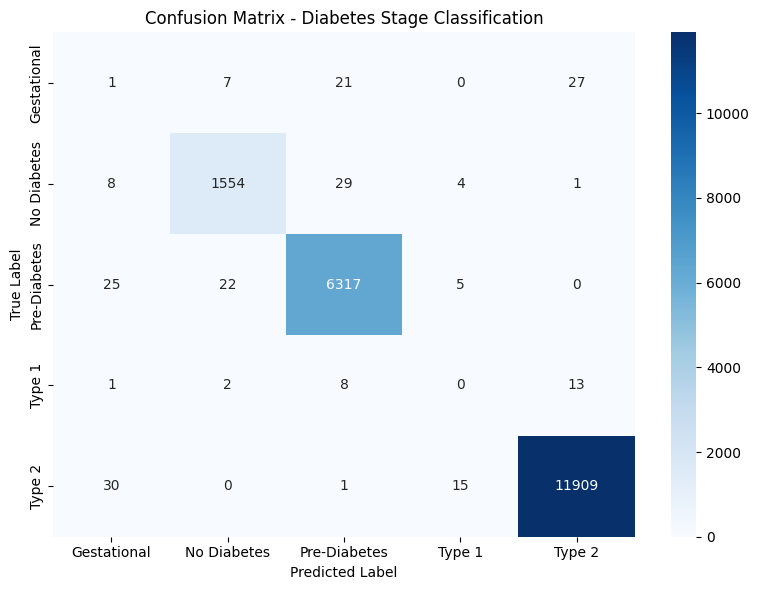


Weighted Precision: 0.9895
Weighted Recall: 0.9890
Weighted F1-Score: 0.9893


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:")
print(classification_report(
    y_test_encoded,
    y_pred,
    target_names=label_encoder.classes_
))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.title('Confusion Matrix - Diabetes Stage Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print(f"\nWeighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")
